# Haberman EDA

### Description 
    
    The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
    
### Attribute Information:

- Age of patient at time of operation (numerical)
- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)
- Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

    
### Objective
- Perform exploratory data analysis (EDA)
- Perform Univariate analysis (PDF, CDF, Box plot, Violin plot) to understand which features are most important.
- Perform Bivariate analysis (Scatter plot, Pair plot) if combination of features help in classification.
- Quantify results using mean, std-dev, median, qantile, percentile, etc...

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [2]:
haberman = pd.read_csv("haberman.csv")

In [7]:
haberman.shape

(306, 4)

In [3]:
# Show sample of the data.
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
# list columns used 
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB



As seen from above the data contains 4 columns(features) and 306 rows(examples) which are all of numerical type.
There isn't also any missing data.

In [8]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

**Status** - is the dependent variable here and from the count above people that survived for 5 years or longer is higher than those who died under 5 years which means the data set is imbalanced.

Now lets see some visualization.

# Scatter plot

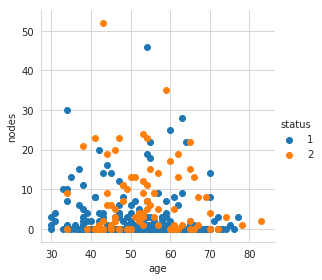

In [9]:
# Scatter plot for the survivors status with color-coding.
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", size=4).map(plt.scatter, "age", "nodes").add_legend()
plt.show()

To make the status more clear, let's make the number to an object **yes** for 1 and **no** for 2.

In [11]:
# modify the target column values to be meaningful as well as categorical

haberman['status'] = haberman['status'].map({1:"yes", 2:"no"})

In [12]:
haberman.head()

,age,year,nodes,status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


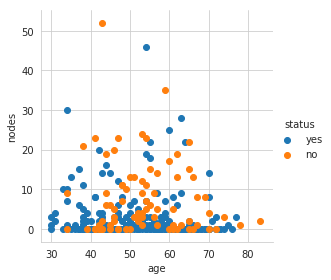

In [13]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", size=4).map(plt.scatter, "age", "nodes").add_legend()
plt.show()

Now it seems that it's more clear but we don't really have a clear separation between the two status.

Let's make pair plot and see the best features that help in the classification problem.

# Pair plot

    Pair plots makes it easier to select two features that are most important in the classification task but comes with some disadvantages.
- They can not be used when number of features are high.
- They can't also help us to visualize higher dimensional patterns in 3-D and 4-D.

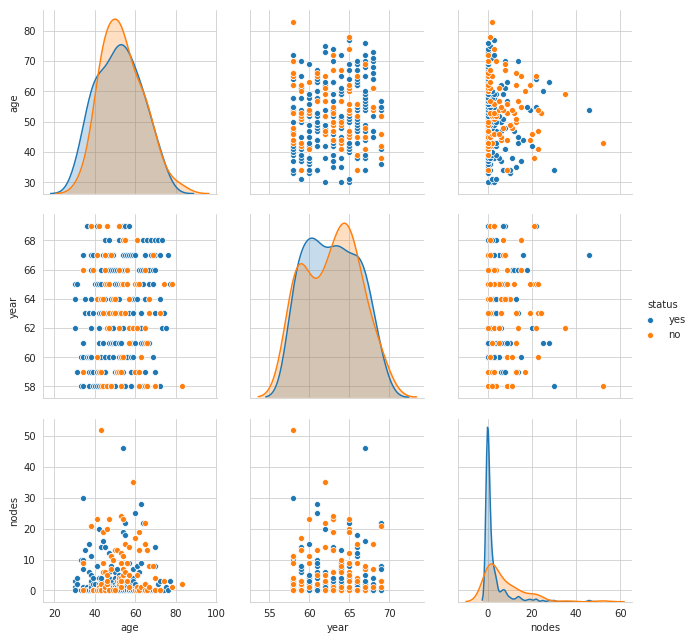

In [14]:
sns.set_style("whitegrid")
sns.pairplot(haberman, "status", size=3)
plt.show()

Most of the points seems to overlap, which makes it difficult for the naked eye. Let's see other plots and try to make sense of the data.

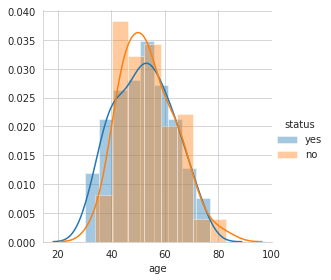

In [17]:
# 1-D plots using the different features.
sns.FacetGrid(haberman, hue="status", size=4).map(sns.distplot, "age").add_legend()
plt.show()

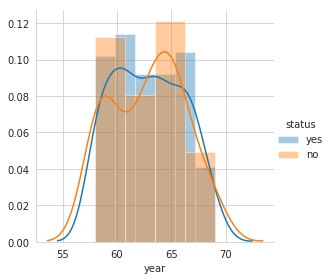

In [18]:
# 1-D plots using the different features.
sns.FacetGrid(haberman, hue="status", size=4).map(sns.distplot, "year").add_legend()
plt.show()

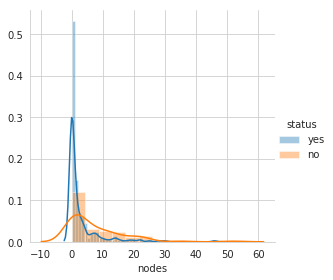

In [20]:
# 1-D plots using the different features.
sns.FacetGrid(haberman, hue="status", size=4).map(sns.distplot, "nodes").add_legend()
plt.show()

# Observation
- The number of survivors is highly dense from 0 to 5

************age***********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
************year***********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
************nodes***********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


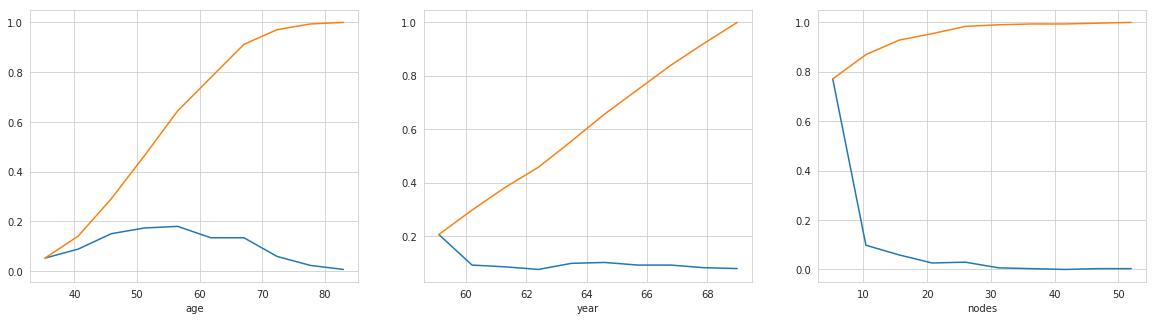

In [41]:
# Let's plot the PDF(Probability Density Function) and CDF(Cumulative Distribution Function) for each features.

plt.figure(figsize=(20,5))
for idx, features in enumerate(list(haberman.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("************" + features + "***********")
    counts, bin_edges = np.histogram(haberman[features], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/(sum(counts))
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)    
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(features)

# Observation

- from the last diagram we can see that almost 80% of the people have less than or equal to 5 positive axilary nodes

Let's see the data's mean, std-dev and other statistical informations.

In [33]:
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


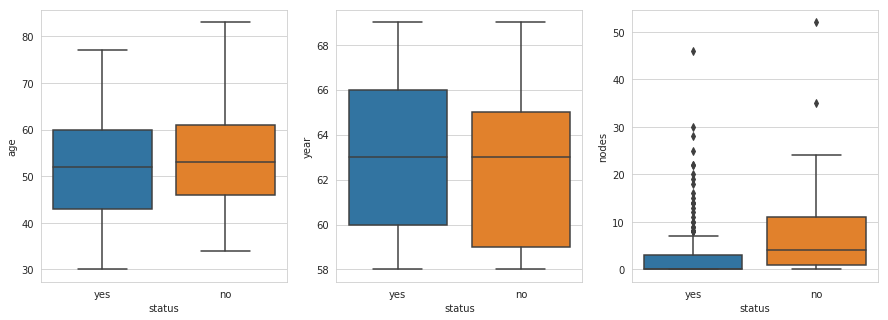

In [38]:
"""
# Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.

#NOTE: In the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

Box-plot can be visualized as a PDF on the side-ways.
Box plot takes a less space and visually represents the five number summary of the data points in a box. 

The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.boxplot( x='status', y=feature, data=haberman, ax=axes[idx])
plt.show() 

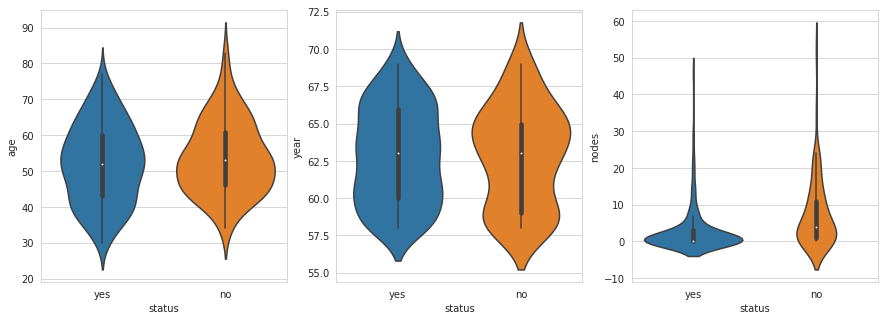

In [40]:
# Violin Plots
"""
Violin plot is the combination of box plot and probability density function.
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.violinplot( x='status', y=feature, data=haberman, ax=axes[idx])
plt.show()


# Observations

- The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest. 

Finally lets plot the density diagram between year and nodes.

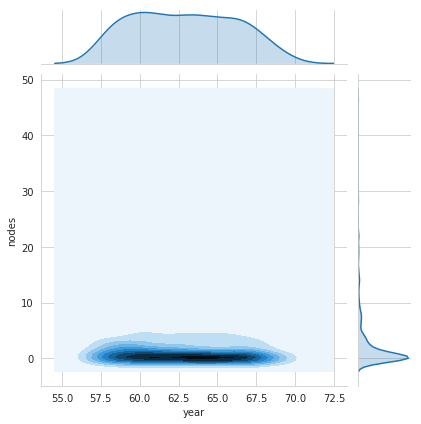

In [52]:
survived = haberman.loc[haberman["status"] == "yes"];
not_survived = haberman.loc[haberman["status"] == "no"];
#2D Density plot, contors-plot
sns.jointplot(x="year", y="nodes", data=survived, kind="kde");
plt.show();

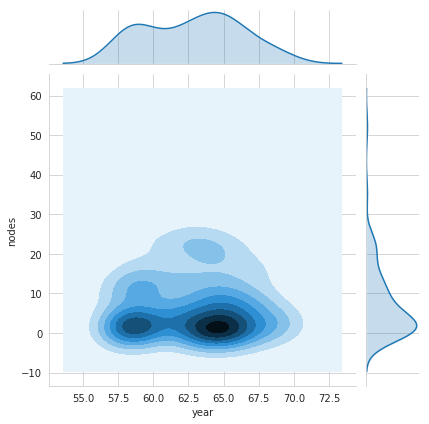

In [53]:
#2D Density plot, contors-plot
sns.jointplot(x="year", y="nodes", data=not_survived, kind="kde");
plt.show();

# Observation

- Now it's more clear that there were more deaths under 5 year between 62 and 67 year and also survivors are high in lower nodes